#### **MACHINE LEARNING MODEL**
Here you will see the implementation of the three machine learning algorithms along with the data visualization.



*   IMPORTING LIBRARIES





In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import seaborn as s
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")



*   DATASET

This machine learning model is trained on the Air Dataset which contains the numeric target variable in a manner to tell the quality of air; on the basis of the amount of gases present.





In [8]:
# Fetching data from the csv file.
dataset = pd.read_csv('/content/drive/MyDrive/Tasks/task(ICA)/Air_Dataset.csv')
dataset.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
0,Mumbai,1/1/19 0:00,77.10,198.19,54.29,78.15,132.44,2.59,19.29,40.50,1.69,178.0
1,Mumbai,1/1/19 1:00,92.64,231.38,61.03,93.62,154.65,2.99,19.99,46.34,1.79,174.0
2,Mumbai,1/1/19 2:00,138.10,375.72,88.72,106.85,195.57,3.74,21.06,55.61,2.54,171.0
3,Mumbai,1/1/19 3:00,143.28,394.84,116.58,107.31,223.89,4.29,22.94,56.63,3.87,170.0
4,Mumbai,1/1/19 4:00,147.77,400.36,136.53,99.64,236.18,4.55,23.84,59.46,4.67,173.0


In [9]:
dataset.shape

(4998, 12)

This tuple represents the number of rows and columns. Here, 
1. 4998 are the total no. of samples. 
2. 12 are the number of feature.

12 Features are described as:

City: Mumbai

Datetime: Date (DD/MM/YYYY)

PM2.5: Particulate Matter

PM10: Particular Matter

NO: Averaged concentration NO in mg/m^3	

NO2: Averaged concentration NO2 in mg/m^3

NOx: Averaged concentration NOx in mg/m^3(Toatal Nitrogen Oxides)

CO: Averaged concentration CO in mg/m^3

SO2: Averaged concentration SO2 in mg/m^3

O3: Averaged concentration O3 in mg/m^3

Benzene: Averaged concentration Benzene in mg/m^3

AQI: Air Quality




### Checking for dependency between the attributes

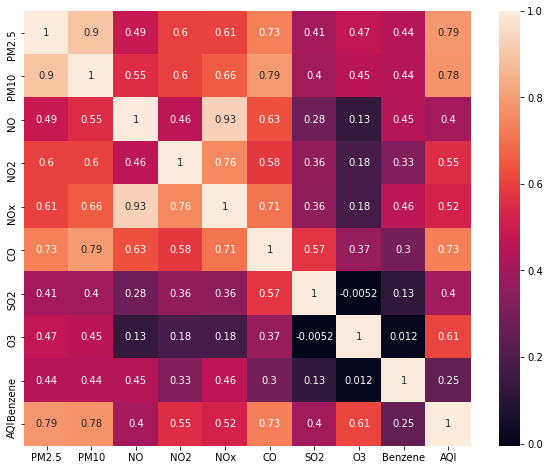

In [10]:
# Visualizing through the values that how it is plotted in terms of heatmap.
plt.figure(figsize=(10,8))
s.heatmap(dataset.corr(), annot=True)

### Data Exploration (EDA)

In [11]:
# Checking the presence of null values. 
dataset.isna().any()

City        False
Datetime    False
PM2.5        True
PM10         True
NO           True
NO2          True
NOx          True
CO           True
SO2          True
O3           True
Benzene      True
AQI          True
dtype: bool

This shows that our dataset columns has many null values. Even null values are also present in the target variable. We can't replace those vaccant places with the mean or any other value. Otherwise it will disturb the prediction. Hence, whole rows will be deleted.   

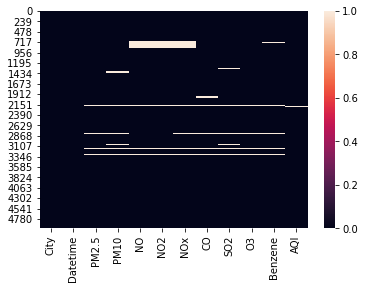

In [12]:
#Heatmap is null repersenting the null values
sns.heatmap(dataset.isna())

The disturbances in the dataset representing the null values.

In [13]:
# Calculating number of null values.
dataset.isnull().sum()

City          0
Datetime      0
PM2.5        90
PM10        158
NO          247
NO2         255
NOx         250
CO          126
SO2         125
O3           87
Benzene      98
AQI          23
dtype: int64

Here, we can see that the target feature(AQI) also carries some null value so we need to remove those samples.

In [14]:
# Let's remove them.
to_remove = np.where(dataset.AQI.isna() == True)
for i in to_remove:
  dataset.drop(i,inplace=True,axis=0)

In [15]:
dataset['City'].unique()

array(['Mumbai'], dtype=object)

In [16]:
# Removing unnecessary columns from the dataset and seperating them in X & y.
X = dataset.drop(['AQI','Datetime','City'], axis=1)
y = dataset.AQI
column_name = X.columns

# From the cell above we find out that dataset has many null values.
# Filling them with mean values.
for i in column_name:
  X[i].fillna(value = X[i].mean(),inplace = True) 

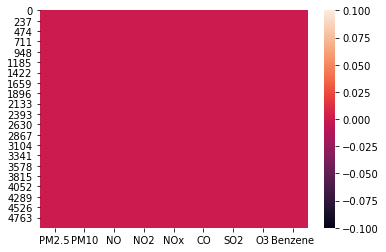

In [17]:
# Heatmap after the removal of null values
sns.heatmap(X.isna())

All the null values are filled now.

In [18]:
# Grabing whole information of dataset.
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4975 entries, 0 to 4997
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    4975 non-null   float64
 1   PM10     4975 non-null   float64
 2   NO       4975 non-null   float64
 3   NO2      4975 non-null   float64
 4   NOx      4975 non-null   float64
 5   CO       4975 non-null   float64
 6   SO2      4975 non-null   float64
 7   O3       4975 non-null   float64
 8   Benzene  4975 non-null   float64
dtypes: float64(9)
memory usage: 388.7 KB


Statistical Information about dataset

In [19]:
# Understanding the dataset minutely.
X.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,4975.0,30.746099,26.452648,0.0,13.360,20.38,39.80500,445.22
PM10,4975.0,103.318667,73.094835,0.0,52.745,83.50,128.93500,453.98
NO,4975.0,38.755040,32.812789,0.0,21.990,28.79,38.75504,406.54
NO2,4975.0,22.338473,18.105962,0.0,11.040,16.20,27.23000,152.86
NOx,4975.0,60.769377,44.125094,0.0,35.550,44.14,65.12500,400.58
CO,4975.0,1.616430,0.943648,0.0,0.730,1.65,1.88000,7.13
SO2,4975.0,16.238973,8.661144,0.0,9.420,15.02,22.91000,62.22
O3,4975.0,35.766007,29.501802,0.0,14.480,22.05,50.54000,185.86
Benzene,4975.0,1.332471,1.382670,0.0,0.330,0.92,1.83500,18.70


In [20]:
X.shape

(4975, 9)

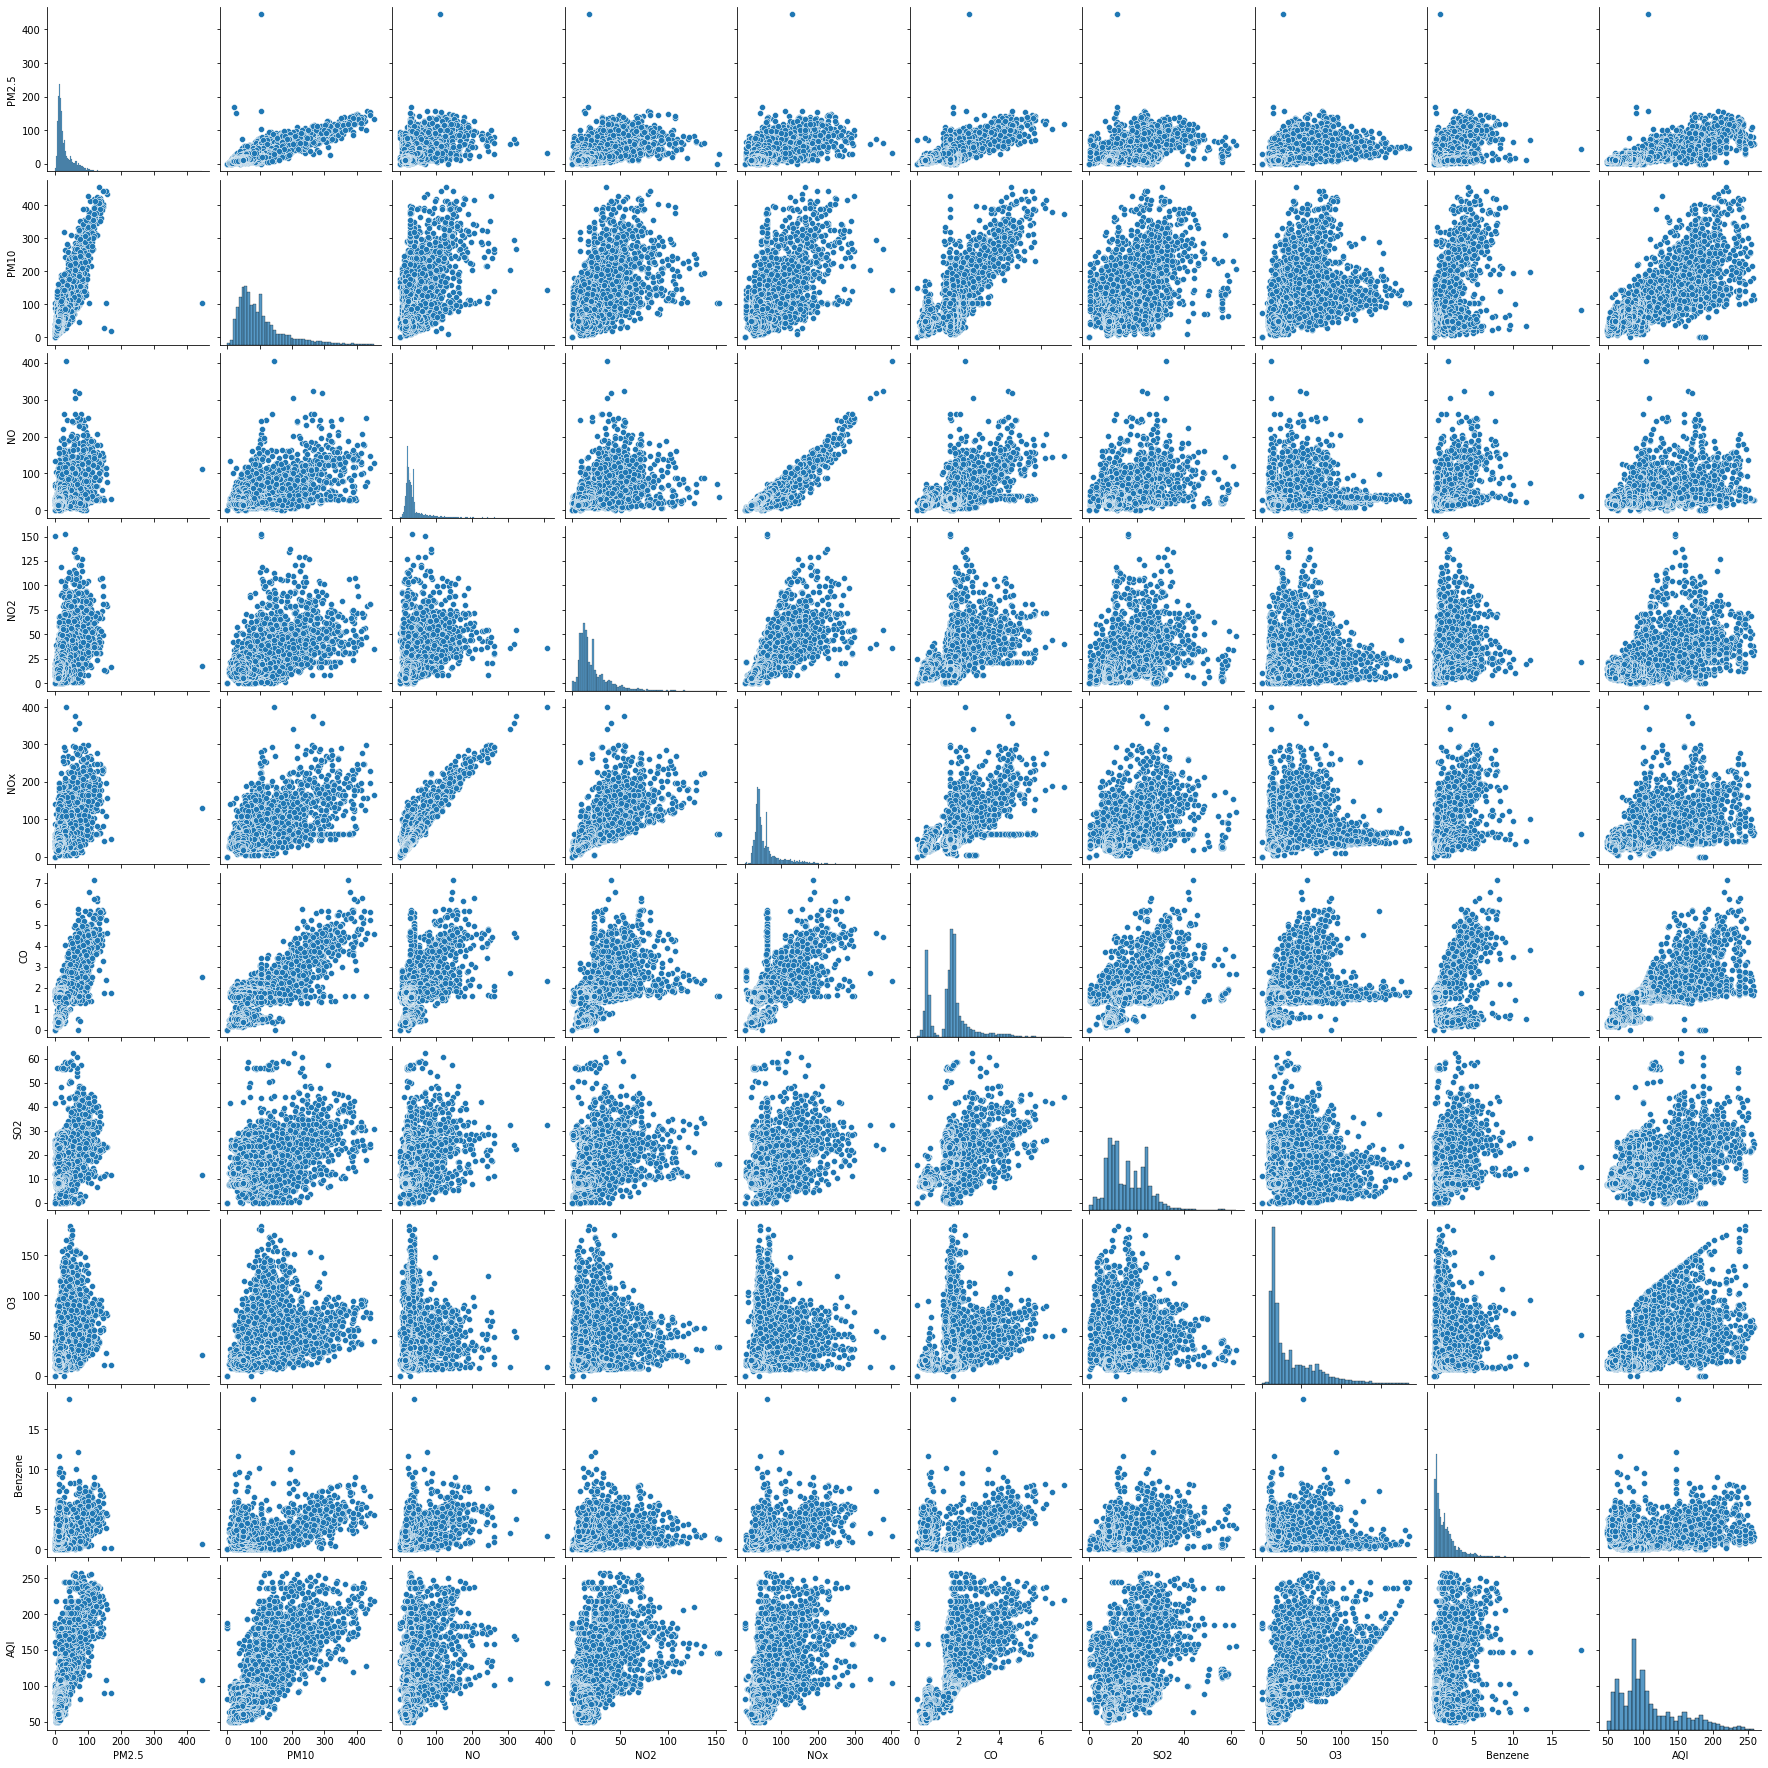

In [21]:
# Plotting pairplot for the dependencies
temp = X
temp['AQI'] = y
sns.pairplot(temp)

In [23]:
X = X.drop(['AQI'], axis=1)

In [24]:
# Initially y is in Series format hence converting it into DataFrame.
y = pd.DataFrame(y)

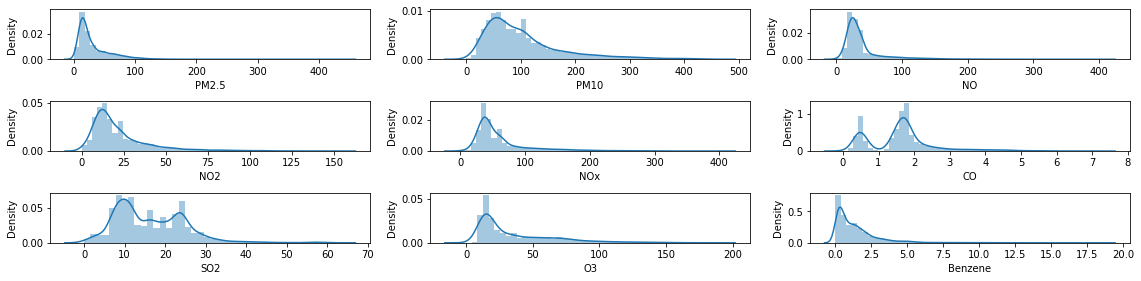

In [25]:
# Displot are constructed to see what is that particular range in which most values lies
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))
col=temp.columns   
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(temp[col[index]], ax=ax[i][j])
        index=index+1
plt.tight_layout()

These displot plots reflects the distribution of data. As we can see above the plots are differently made as the values are lying in different ranges. The values which are too far from the skewness arre considered as outliers. But as data is too large so these will not affect the outcome.

In [26]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)
X.shape

(4975, 9)

**TECHNIQUES**


1. NEURAL NETWORK

In [27]:
# Defining Model
# Considering the importance of each layer along with optimization function.
model = Sequential()
model.add(Dense(9, input_dim=9, activation='relu'))#, kernel_initializer='he_uniform'))
model.add(Dense(16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))


opt = Adam(0.0001)
model.compile(loss='mse', optimizer=opt)
history = model.fit(X,y,validation_split=0.2, epochs=100, verbose=1)

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 0.6538 - val_loss: 0.3937
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3836 - val_loss: 0.2320
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3180 - val_loss: 0.1934
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2901 - val_loss: 0.1517
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2689 - val_loss: 0.1183
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2534 - val_loss: 0.1232
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2552 - val_loss: 0.1215
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2487 - val_loss: 0.1144
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2457 - val_loss: 0.1002
Epoch 10/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2524 - val_lo

PLOTTING

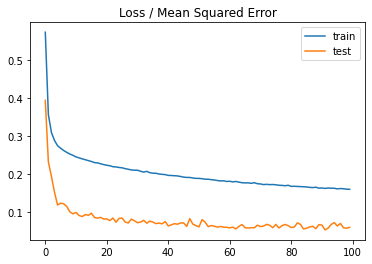

In [28]:
# Plotting the loss of the model with each epoch
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

2. LINEAR REGRESSION

In [29]:
# Splitting data
# Although it is not necessary here as values are lying close to each other.
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)
X_train,X_test,y_train,y_test =  train_test_split(X, y, random_state = 0, test_size = 0.2)

In [30]:
# Training the model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print("Coefficient:",LRmodel.coef_)
print("Intercept:",LRmodel.intercept_)

Coefficient: [[ 0.26577611  0.17312831  0.07858474  0.19822935 -0.18581242  0.21554242
   0.07850822  0.31513968 -0.02923466]]
Intercept: [0.00090957]


In [31]:
# Prediction
LRpredicted = LRmodel.predict(X_test)

In [34]:
# Verifying results
print("Explained variance score:",explained_variance_score(y_test, LRpredicted))
print("Mean absolute error:",mean_absolute_error(y_test, LRpredicted))
print("Mean squared error:", mean_squared_error(y_test, LRpredicted))

Explained variance score: 0.752567541115772
Mean absolute error: 0.32092361898033495
Mean squared error 0.2260998212525681


In [40]:
# CrossValidation is calculted for 5 times
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LRmodel, X_train, y_train, cv=5)
scores

array([0.70829538, 0.72991404, 0.78183128, 0.76783323, 0.74465318])

3. RANDOM FOREST REGRESSOR


In [41]:
# Model Training
RFRmodel = RandomForestRegressor()
RFRmodel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
# Predicting
RFRpredicted = RFRmodel.predict(X_test)

In [45]:
# Verifying results
print("Explained variance score:",explained_variance_score(y_test, RFRpredicted))
print("Mean absolute error:",mean_absolute_error(y_test, RFRpredicted))
print("Mean squared error:", mean_squared_error(y_test, RFRpredicted))

Explained variance score: 0.8699780463288627
Mean absolute error: 0.2143518096102439
Mean squared error: 0.11976597472037705


In [46]:
# CrossValidation to validate randomly taken data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RFRmodel, X_train, y_train, cv=5)
scores

array([0.85401906, 0.8520114 , 0.88273824, 0.85928808, 0.86879159])

**CONCLUSION:**

After observing the accuracy score of the models used in this Machine Learning Model (Neural Network, Linear Regression, Random Forest Regressor) we came to know that 

Random Forest Regressor has 0.867
Linear Regression has 0.752

Here, Random Forest Regressor is performing better. 

CONSIDERING THE MEAN SQUARED ERROR
Neural Network :0.1623
Random Forest Regressor:0.119
Linear Regression0.2260

Hence, Random Forest Regressor is performing better. 